# CREDIT CARD FRAUD DETECTION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.decomposition import PCA

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
import warnings
warnings.filterwarnings('ignore')

## Data Set Description

In [5]:
data = pd.read_csv("Downloads/creditcard.csv")

In [6]:
# assigning column name as 1,2,3,...,31 for ease of reference
data.columns = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class']

In [7]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
657,497,-0.417836,0.981103,1.135820,-0.172593,0.396675,-0.002842,0.519780,0.248763,-0.593497,...,-0.205580,-0.547474,-0.020486,-0.368187,-0.227053,0.105281,0.253800,0.081276,8.83,0
658,498,-0.753769,1.098287,1.835453,0.614571,-0.317859,-0.101055,0.039454,-0.656824,-0.048761,...,1.101142,0.686059,0.005954,0.361744,-0.457852,-0.352576,0.094602,0.170480,5.00,0
659,499,1.255439,0.307729,0.292700,0.699873,-0.428876,-1.088456,0.043840,-0.167739,0.128854,...,-0.294795,-0.882126,0.136846,0.327949,0.194459,0.096516,-0.027271,0.029491,1.98,0
660,499,1.355790,-1.122921,1.191187,-0.576548,-1.708750,0.274721,-1.640785,0.295838,0.618649,...,0.302035,0.920013,-0.210219,-0.435499,0.450803,0.068454,0.062214,0.022191,22.83,0
661,499,-0.860626,-0.109137,2.112474,-1.400567,0.180269,1.329656,0.431001,0.317761,0.593762,...,-0.197635,-0.436535,-0.194840,-1.236873,0.218668,0.902383,-0.210195,-0.190458,92.82,0


In [8]:
data.shape

(662, 31)

In [9]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
1,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
2,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
3,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
4,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0


In [10]:
# quick view of data-types & non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 31 columns):
Time      662 non-null int64
V1        662 non-null float64
V2        662 non-null float64
V3        662 non-null float64
V4        662 non-null float64
V5        662 non-null float64
V6        662 non-null float64
V7        662 non-null float64
V8        662 non-null float64
V9        662 non-null float64
V10       662 non-null float64
V11       662 non-null float64
V12       662 non-null float64
V13       662 non-null float64
V14       662 non-null float64
V15       662 non-null float64
V16       662 non-null float64
V17       662 non-null float64
V18       662 non-null float64
V19       662 non-null float64
V20       662 non-null float64
V21       662 non-null float64
V22       662 non-null float64
V23       662 non-null float64
V24       662 non-null float64
V25       662 non-null float64
V26       662 non-null float64
V27       662 non-null float64
V28       662 non-null float6

In [11]:
# checking numbers of unique value in each columns
for col in data.columns:
    print(len(np.unique(data[col])),end =' , ')

355 , 655 , 655 , 655 , 655 , 655 , 655 , 655 , 655 , 655 , 655 , 655 , 655 , 655 , 655 , 655 , 655 , 655 , 655 , 655 , 655 , 655 , 655 , 655 , 655 , 655 , 655 , 655 , 655 , 462 , 2 , 

In [12]:
pd.crosstab(index=data['Class'],columns='Count',normalize=True)

col_0,Count
Class,
0,0.960725
1,0.039275


approx 96.1% of the total transction are not fraud

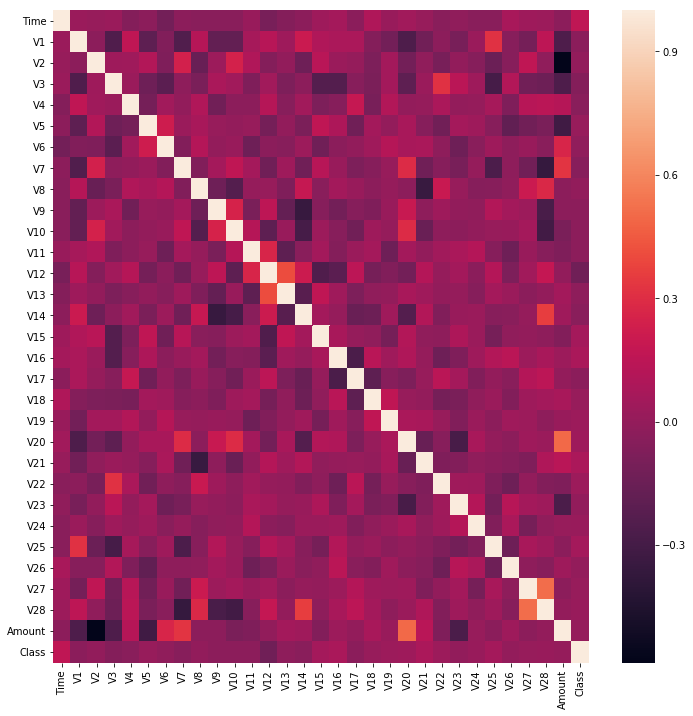

In [13]:
ccd_corr = data.corr()
plt.figure(figsize=(12,12))
sns.heatmap(ccd_corr,annot=False)

In [14]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,...,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000
mean,241.087613,-0.171685,0.203339,0.865507,0.312177,0.005481,0.190657,0.119999,-0.058113,-0.022026,...,0.011604,-0.101897,-0.039030,-0.001231,0.118344,0.024121,0.026115,-0.015513,70.219940,0.039275
std,146.878674,1.318935,1.195939,1.016148,1.268311,1.131878,1.249667,0.861213,0.829037,0.898050,...,0.611495,0.609526,0.369470,0.628766,0.426891,0.468805,0.308407,0.291266,206.580833,0.194395
min,0.000000,-6.093248,-12.114213,-5.694973,-4.657545,-6.631951,-3.498447,-4.925568,-7.494658,-2.770089,...,-4.134608,-2.776923,-3.553381,-1.867208,-1.389079,-1.243924,-2.377933,-2.735623,0.000000,0.000000
25%,105.250000,-0.898800,-0.174281,0.311406,-0.436612,-0.553732,-0.614206,-0.325427,-0.158631,-0.517332,...,-0.219976,-0.528998,-0.172891,-0.384998,-0.160561,-0.313283,-0.045096,-0.015094,5.975000,0.000000
50%,241.500000,-0.373362,0.280917,0.894895,0.444094,-0.106432,-0.072322,0.116329,0.043828,-0.074044,...,-0.070155,-0.072565,-0.045317,0.093423,0.145592,-0.015632,0.022920,0.023137,17.240000,0.000000
75%,366.000000,1.109776,0.877703,1.505101,1.140394,0.469752,0.491334,0.567795,0.263080,0.415549,...,0.102520,0.312472,0.073996,0.429869,0.440540,0.264540,0.114210,0.088143,57.147500,0.000000
max,499.000000,1.586093,5.267376,3.772857,4.075817,7.672544,5.122103,4.808426,1.726413,5.459274,...,5.273420,1.461535,3.150413,1.215279,1.136720,3.065576,2.490503,1.575380,3828.040000,1.000000


as last two block clearly shows the wide scale difference between various features 
we need to **scale** the ferures between 0-1

In [15]:
scaler = StandardScaler()

In [16]:
data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))
data['Time'] = scaler.fit_transform(data['Time'].values.reshape(-1, 1))

In [17]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.642648,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.327141,0
1,-1.635834,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.494201,0
2,-1.635834,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.258109,0
3,-1.629021,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.001114,0
4,-1.629021,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.322393,0


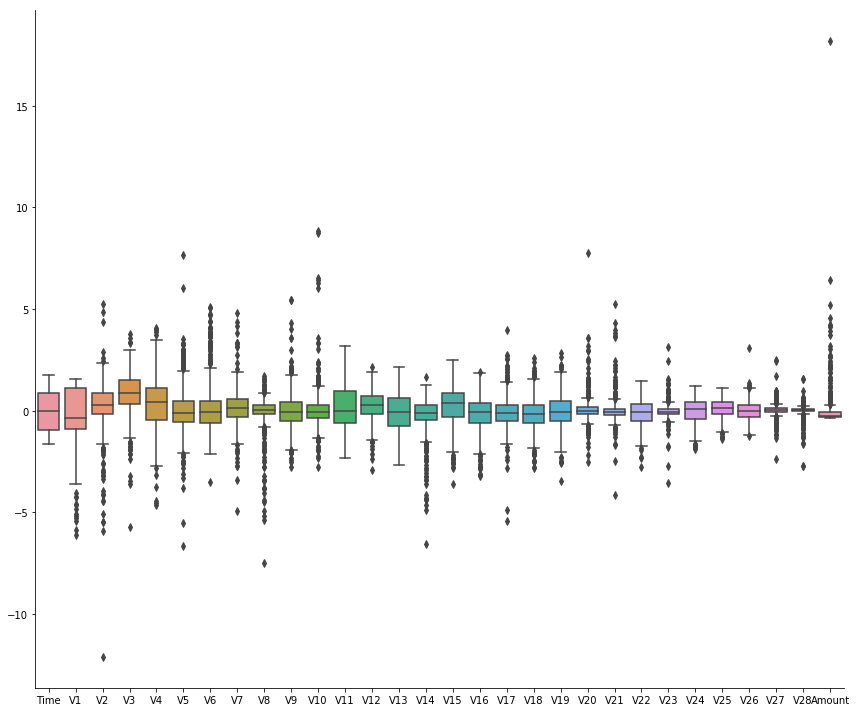

In [18]:
sns.catplot(data=data.iloc[:,:30], kind="box",height=10,aspect=1.2);

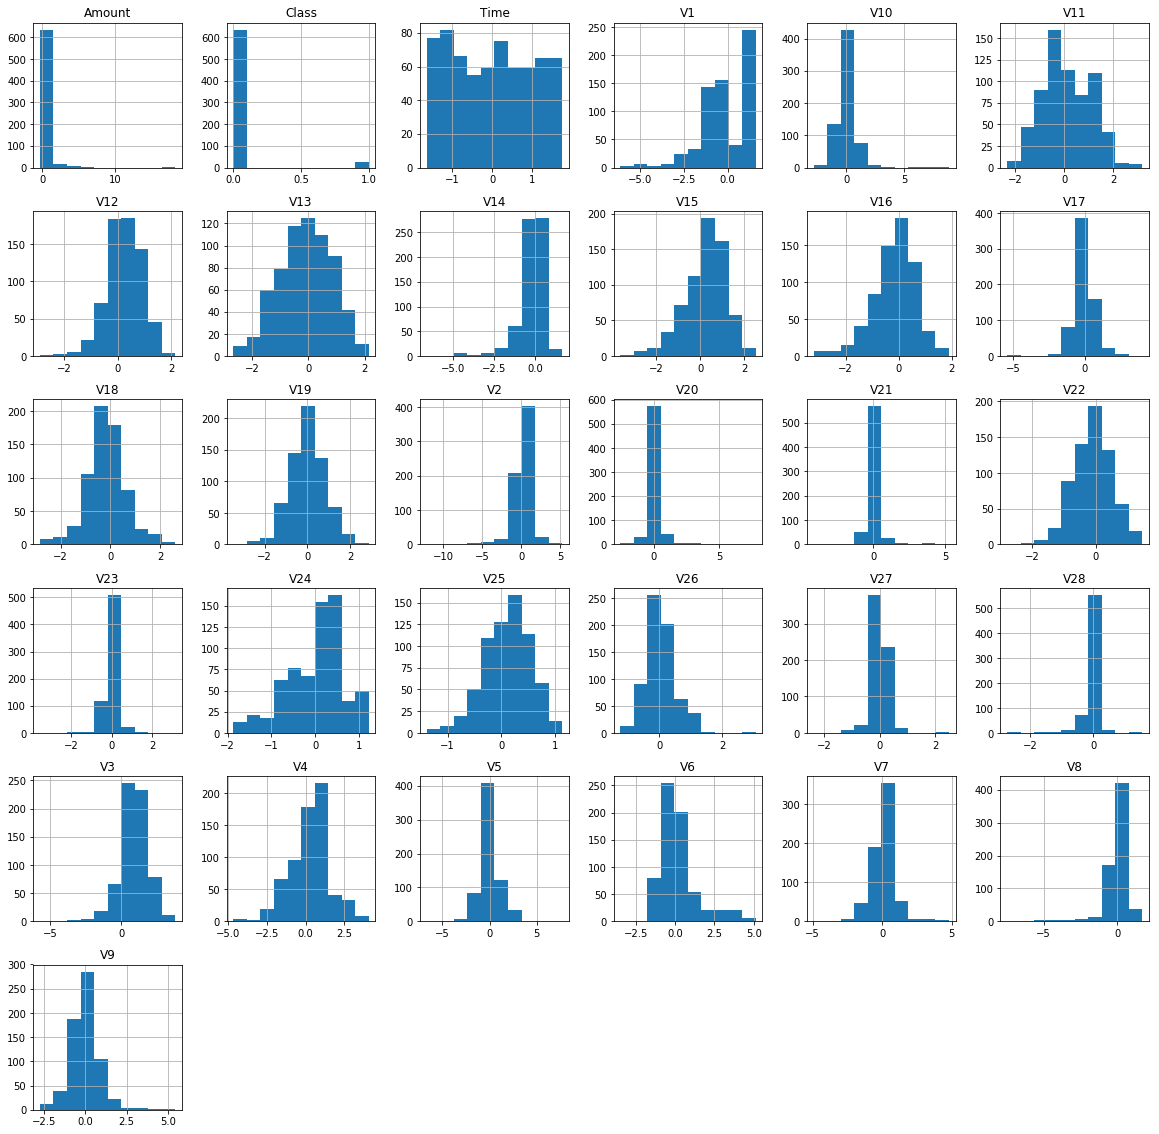

In [19]:
data.hist(figsize = (20, 20))
plt.show()

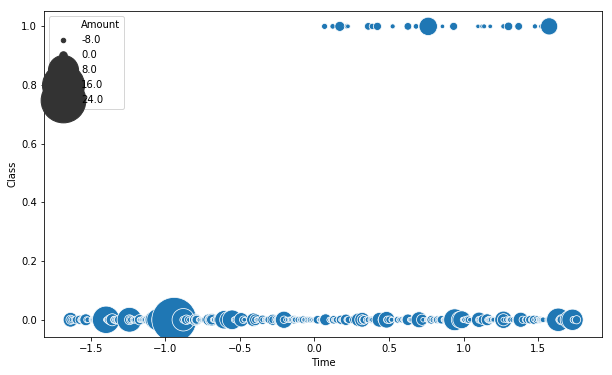

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=data['Time'],y=data['Class'],size=data['Amount'],sizes = (20,2000))

 the 'Class' vs 'Time' plot clearly show that there no significant correlation between Class-Time & Class-Amount

In [21]:
X = data.iloc[:,:-1].values
print(X.shape)
y = data.iloc[:,-1].values
y = y.reshape(-1, 1)
print(y.shape)

(662, 30)
(662, 1)


In [22]:
pca = PCA().fit(X)

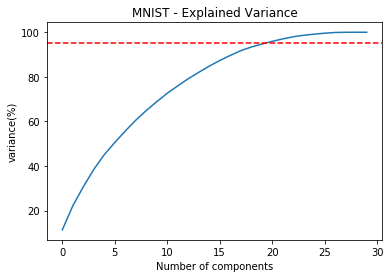

In [23]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel('Number of components')
plt.ylabel('variance(%)')
plt.title('MNIST - Explained Variance')
plt.axhline(y=95,color = 'r', linestyle = '--')
plt.show()

In [24]:
pca  = PCA(20).fit(X)
X_transformed = pca.transform(X)

In [25]:
X_transformed.shape

(662, 20)

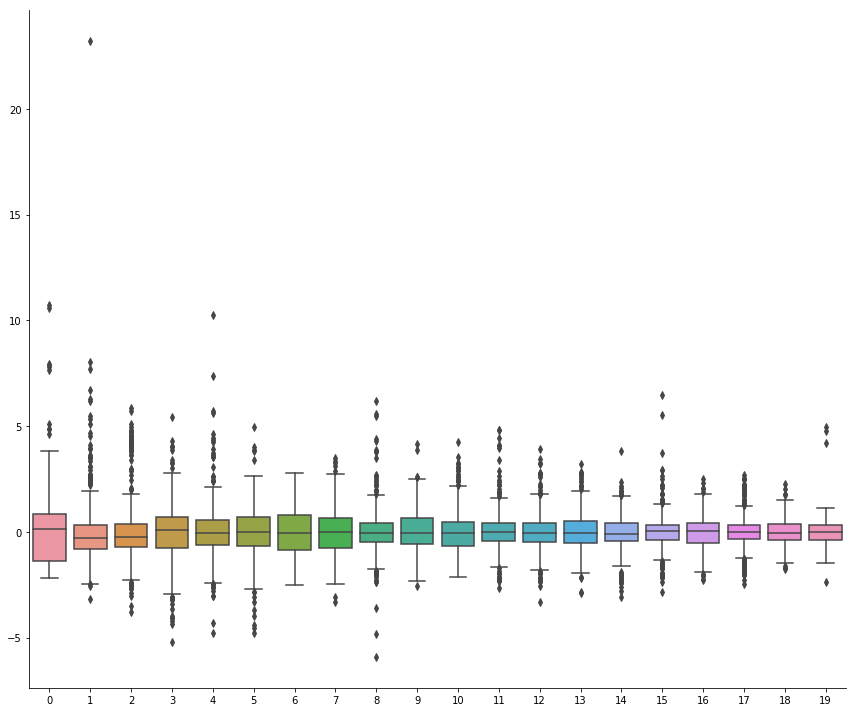

In [26]:
sns.catplot(data=pd.DataFrame(X_transformed), kind="box",height=10,aspect=1.2);

## Predictive models

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=46, stratify = y)

In [29]:
pd.DataFrame(X_train[:5])

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-1.465497,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,-0.283264,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,-0.331598
1,1.171323,-1.581222,0.391512,1.916333,-0.087840,-0.421410,0.270447,-0.135966,0.231828,0.377201,...,-0.335264,0.142557,0.621812,0.213053,0.018859,-0.305393,0.300156,-0.287681,0.185402,-0.194841
2,0.803395,1.261597,0.256346,0.513254,0.619054,-0.472482,-0.989342,0.065431,-0.208781,0.035924,...,-0.090150,-0.257305,-0.739810,0.135646,0.376418,0.220320,0.094706,-0.028559,0.019023,-0.333923
3,-1.308787,1.098608,0.202424,0.525456,1.323436,-0.130486,0.039924,0.028379,0.072841,-0.097869,...,-0.128041,-0.024972,0.154264,-0.063147,0.253205,0.629405,-0.345345,0.040469,0.010264,-0.276323
4,-1.615394,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,-0.315999


In [30]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_transformed, y, test_size=0.33, random_state=46, stratify = y)

In [31]:
pd.DataFrame(X_train_pca[:5])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.289267,-0.358306,-0.207353,-0.568192,-1.126476,-0.154337,-1.042108,1.296395,-1.018227,-0.006421,-0.820356,0.306822,-1.088884,-0.820890,0.802148,-0.466479,-0.335545,-0.219745,0.160305,0.541204
1,1.249307,-0.302364,-0.738266,0.451315,-0.403416,0.629414,-1.176728,-0.924648,-0.189423,0.370303,-0.006565,-0.672967,0.459070,0.059425,-0.175543,0.451983,1.687062,-0.522726,0.180380,-0.205448
2,-1.374010,-1.265746,-0.122329,0.713214,0.897691,0.324555,0.730069,-0.412225,0.353396,-0.251108,0.141321,0.169637,0.229495,-0.714790,-0.368322,0.269580,0.018497,0.083760,-0.409885,-0.295732
3,-1.673351,-0.542707,-0.107893,-1.013573,0.059010,-0.930204,-0.850224,1.656055,-0.113394,0.851912,-0.897071,0.291815,-0.568915,-0.672467,-0.287927,0.099724,-0.365467,0.232953,-0.006309,0.270018
4,-1.412019,-0.040861,0.800765,-0.914180,-0.294453,-0.818751,0.747280,0.461279,0.329551,-1.921184,0.003334,0.883776,-0.147614,0.026275,0.251083,0.062743,-0.908180,-0.442813,0.534019,0.317271


### Logistic Regression
##### before PCA

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score,roc_auc_score
from sklearn.metrics import precision_score,recall_score

In [33]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr.score(X_test,y_test)*100

94.52054794520548

In [34]:
#print confusion matrix and accuracy score
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print(lr_conf_matrix)
print(lr_acc_score*100)

[[207   3]
 [  9   0]]
94.52054794520548


##### after PCA

In [35]:
lr_pca = LogisticRegression()
lr_pca.fit(X_train_pca, y_train_pca)
lr_pca_predict = lr_pca.predict(X_test_pca)
lr_pca.score(X_test_pca,y_test_pca)*100

94.52054794520548

In [36]:
#print confusion matrix and accuracy score
lr_pca_conf_matrix = confusion_matrix(y_test_pca, lr_pca_predict)
lr_pca_acc_score = accuracy_score(y_test_pca, lr_pca_predict)
print(lr_pca_conf_matrix)
print(lr_pca_acc_score*100)

[[207   3]
 [  9   0]]
94.52054794520548


chossing 95% feature(PCA = 20) of 30 feature variables helped to maintain the accuracy as shown in LogisticRegression above.

### Random Forrest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rfc = RandomForestClassifier()

In [39]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [40]:
pred = rfc.predict(X_test)

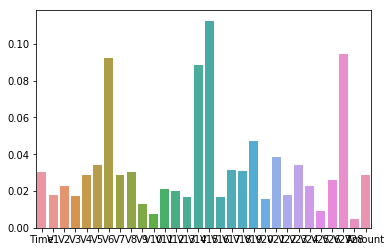

In [41]:
feature  =rfc.feature_importances_
col  = data.columns[:-1]
sns.barplot(x=col,y=feature)

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
accuracy_score(y_test,pred)

0.958904109589041

### Gradient Boosting Classifier

In [44]:
from sklearn.ensemble import GradientBoostingClassifier

In [45]:
gbc = GradientBoostingClassifier()

In [46]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [47]:
pred_gbc = gbc.predict(X_test)

In [48]:
feature  =gbc.feature_importances_
col  = data.columns[:-1]
feature_values = pd.DataFrame({
    "Features":col,
    "Values":feature,
                   })

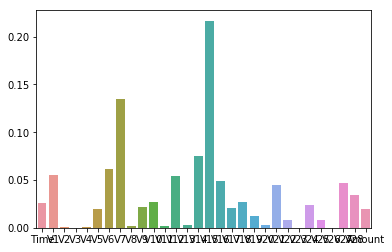

In [49]:
sns.barplot(x=col,y=feature)

In [50]:
accuracy_score(y_test,pred_gbc)

0.958904109589041

### XG Boost

In [51]:
import xgboost as xgb

In [52]:
xgb_cls = xgb.XGBClassifier()

In [53]:
xgb_cls.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [54]:
pred_xgb = xgb_cls.predict(X_test)

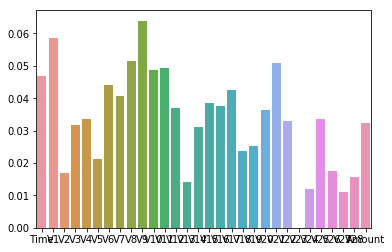

In [55]:
feature  =xgb_cls.feature_importances_
col  = data.columns[:-1]
sns.barplot(x=col,y=feature)

In [56]:
accuracy_score(y_test,pred_xgb)

0.958904109589041